<img style="float: left;;" src='../Imagenes/iteso.jpg' width="50" height="100"/></a>

# <center> <font color= #000047> Módulo II: Aprendizaje No supervizado: Clustering



# Clustering

> Se le llama “clustering” a la formación de grupos o agrupaciones entre
muestras o entre variables.

> Los “clusters” son formados por datos que cumplen una condición de
agrupación definida en función de algún índice de similitud.

> Los agrupamientos no siempre serán los mismos, ya que depende del tipo de
dato y también depende del tipo de índice de similitud.

> El “Herarchical Clustering” es un algoritmo exhaustivo que realiza la
comparación de todos los datos contra todos. Además es clasificado como un
algoritmo no supervisado, porque no se conoce de antemano los resultados
del proceso de “clustering”.

<div class="alert alert-danger" style="margin: 10px">Diapos.</div>

> Las variables más similares son usadas para crear un cluster o grupo.

> Esto equivale a crear una nueva muestra o nueva variable combinando las similitudes de los pares más similares.
> El criterio más usado es el llamado “complete linkage”.

> Este criterio se basa en crear una nueva muestra o variables eligiendo la máxima similitud del par similar contra los demás datos.

## Métodos de Aglomeración

|Método               |                         | 
|:-------------------:|:------------------------------------------|
|**Complete**             | $d(u,v) = \max(d(u[i],k[i]),d(v[i],k[i]))$ |
|**Single**               | $d(u,v) = \min(d(u[i],k[i]),d(v[i],k[i]))$ |
|**Average**              | $d(u,v) = \frac{n_u d(u[i],k[i]) + n_v d(v[i],k[i])}{n_u + n_v}$|
|**Centroid**             | $d(u,v) = ||c_u - c_v ||_2 = \sqrt(\frac{n_u d(u[i],k[i]) + n_v d(v[i],k[i])}{n_u + n_v} - \frac{n_u n_v d(u[i],v[i])}{(n_u + n_v)^2})$                      |
|**Ward**                 | $d(u,v) = \sqrt(\frac{n_u d(u[i],k[i]) + (n_v + n_k) d(v[i],k[i]) - n_k d(u[i],v[i])}{n_u + n_v + n_k})$                      |



## Ejemplo de Clustering Jerárquico

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster import hierarchy

In [2]:
np.random.seed(100)
a = np.random.multivariate_normal([10,10], [[3,0],[0,3]], size=[100])
b = np.random.multivariate_normal([0,20], [[3,0],[0,3]], size=[100])
c = np.random.multivariate_normal([20,20], [[3,0],[0,3]], size=[100])

x = np.concatenate((a,b,c))


In [3]:
x

array([[ 6.96931730e+00,  1.05935399e+01],
       [ 1.19971166e+01,  9.56276796e+00],
       [ 1.16996975e+01,  1.08906532e+01],
       [ 1.03830944e+01,  8.14663059e+00],
       [ 9.67178359e+00,  1.04416755e+01],
       [ 9.20667399e+00,  1.07537253e+01],
       [ 8.98918372e+00,  1.14148206e+01],
       [ 1.11651866e+01,  9.81915459e+00],
       [ 9.07979539e+00,  1.17835493e+01],
       [ 9.24112684e+00,  8.06301598e+00],
       [ 1.28041585e+01,  1.26701385e+01],
       [ 9.56373253e+00,  8.54085850e+00],
       [ 1.03195957e+01,  1.16230740e+01],
       [ 1.12661297e+01,  1.23582844e+01],
       [ 9.43493911e+00,  1.00964337e+01],
       [ 1.03852074e+01,  7.50027484e+00],
       [ 8.68995938e+00,  1.14141398e+01],
       [ 1.12998085e+01,  9.21027676e+00],
       [ 1.20604862e+01,  7.07176576e+00],
       [ 7.65064793e+00,  7.86536080e+00],
       [ 9.05700371e+00,  8.84269260e+00],
       [ 1.00126692e+01,  8.93835897e+00],
       [ 1.22512297e+01,  6.99819033e+00],
       [ 8.

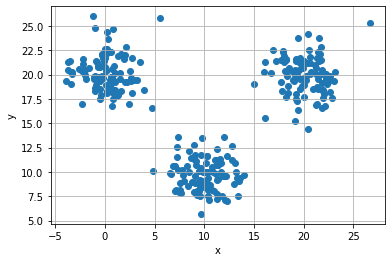

In [4]:
plt.figure(figsize=(6,4))
plt.scatter(x[:,0], x[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()


In [5]:
#Aplicar el clustering jerárquico
z = hierarchy.linkage(x, metric = 'euclidean', method='ward')

In [6]:
z.shape

(299, 4)

## Criterios de selección de grupos


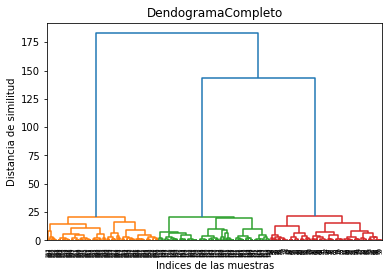

In [7]:
# Criterio del dendrograma

dn = hierarchy.dendrogram(z)
plt.title('DendogramaCompleto')
plt.xlabel('Indices de las muestras')
plt.ylabel('Distancia de similitud')
plt.show()

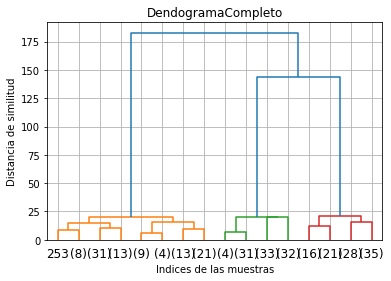

In [8]:
dn = hierarchy.dendrogram(z, truncate_mode='level', p=3)
plt.title('DendogramaCompleto')
plt.xlabel('Indices de las muestras')
plt.ylabel('Distancia de similitud')
plt.grid()
plt.show()

In [9]:
gruposmax = 3
grupos = hierarchy.fcluster(z, gruposmax, criterion="maxclust")


In [10]:
grupos

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

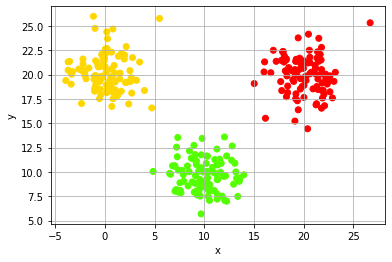

In [11]:
plt.figure(figsize=(6,4))
plt.scatter(x[:,0], x[:,1], c=grupos, cmap=plt.cm.prism)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

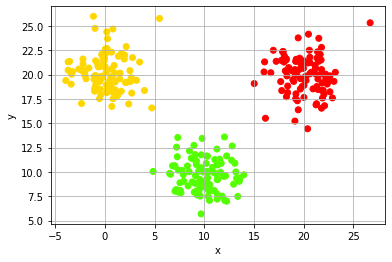

In [39]:
distmax=75
grupos = hierarchy.fcluster(z, distmax, criterion="distance")

plt.figure(figsize=(6,4))
plt.scatter(x[:,0], x[:,1], c=grupos, cmap=plt.cm.prism)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

## Otros criterios de selección

### Criterio del Codo (1er criterio)


In [30]:
last = z[-30:,2]
last_rev = last[::-1]
indx_group = np.arange(1,len(last_rev)+1)


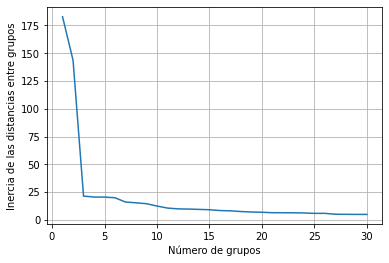

In [31]:
# Gráfica del codo
plt.plot(indx_group,last_rev)
plt.xlabel('Número de grupos')
plt.ylabel('Inercia de las distancias entre grupos')
plt.grid()
plt.show()

In [32]:
def criterio_codo(z, n_grupos):
    last = z[-n_grupos:,2]
    last_rev = last[::-1]
    indx_group = np.arange(1,len(last_rev)+1)
    
    # Gráfica del codo
    plt.plot(indx_group,last_rev)
    plt.xlabel('Número de grupos')
    plt.ylabel('Inercia de las distancias entre grupos')
    plt.grid()
    plt.show()

    

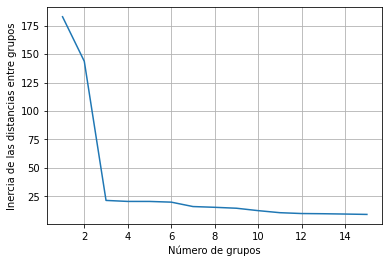

In [36]:
criterio_codo(z, 15)

### Criterio del gradiente


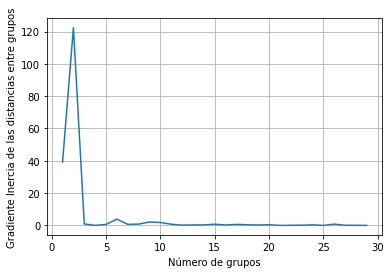

In [40]:
gradiente = np.diff(last)
grad_rev = gradiente[::-1]

indx_group = np.arange(1,len(last_rev))

# Gráfica del codo
plt.plot(indx_group,grad_rev)
plt.xlabel('Número de grupos')
plt.ylabel('Gradiente Inercia de las distancias entre grupos')
plt.grid()
plt.show()

In [58]:
def criterio_gradiente(z, n_grupos):
    last = z[-n_grupos:,2]
    gradiente = np.diff(last)
    grad_rev = gradiente[::-1]

    indx_group = np.arange(2,len(grad_rev)+2)

    # Gráfica del codo
    plt.plot(indx_group,grad_rev)
    plt.xlabel('Número de grupos')
    plt.ylabel('Gradiente Inercia de las distancias entre grupos')
    plt.grid()
    plt.show()

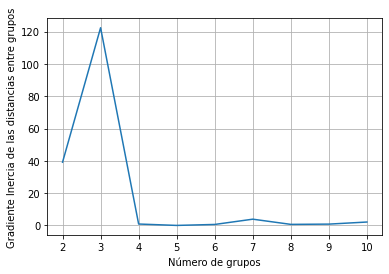

In [59]:
criterio_gradiente(z,10)

## Aplicar número de grupos opt

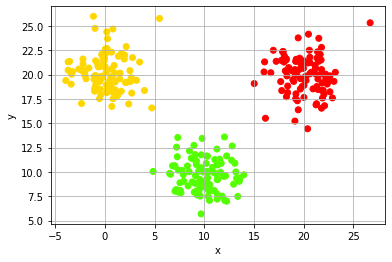

In [61]:
gruposmax = 3
grupos = hierarchy.fcluster(z, gruposmax, criterion="maxclust")


plt.figure(figsize=(6,4))
plt.scatter(x[:,0], x[:,1], c=grupos, cmap=plt.cm.prism)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

## Ejemplo 2: 

Consideremos el datasety `shopping-data.csv`, este dataset contiene información sobre el ingreso anual y gastos de clientes de una empresa.

Conservaremos las columnas Ingresos anuales (en miles de dólares) y Puntuación de gastos (1-100). La columna Spending Score indica la frecuencia con la que una persona gasta dinero en un centro comercial en una escala del 1 al 100, siendo 100 el que más gasta.

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
import scipy.spatial.distance as sc
import pandas as pd

In [63]:
data = pd.read_csv('../Data/shopping-data.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [64]:
data = data.iloc[:,3:5].values

In [66]:
z = hierarchy.linkage(data, metric='euclidean', method='complete')

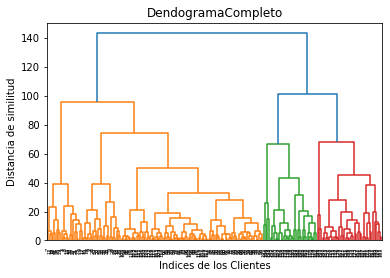

In [68]:
dn = hierarchy.dendrogram(z)
plt.title('DendogramaCompleto')
plt.xlabel('Indices de los Clientes')
plt.ylabel('Distancia de similitud')
plt.show()

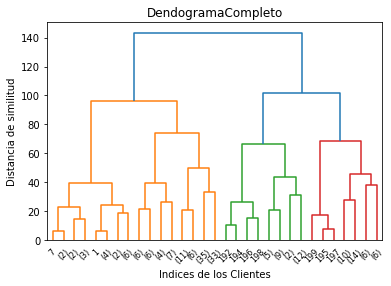

In [69]:
dn = hierarchy.dendrogram(z, truncate_mode='level', p=4)
plt.title('DendogramaCompleto')
plt.xlabel('Indices de los Clientes')
plt.ylabel('Distancia de similitud')
plt.show()

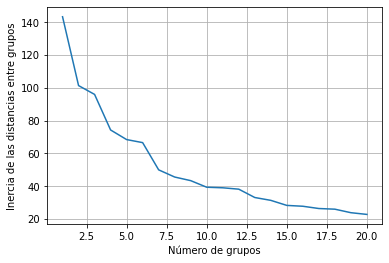

In [71]:
# 2do criterio (criterio del codo)

criterio_codo(z,20)


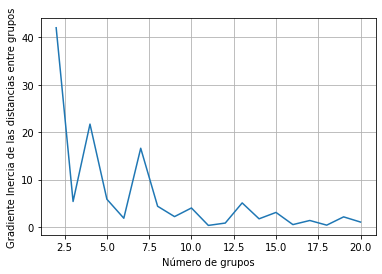

In [72]:
# 3er criterio (criterio del gradiente)

criterio_gradiente(z,20)

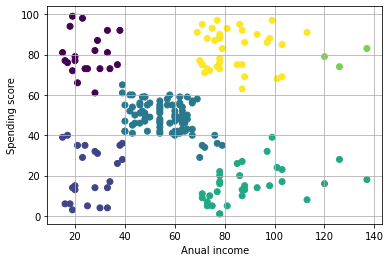

In [80]:
n_grupos=6
grupos = hierarchy.fcluster(z,n_grupos,criterion='maxclust')

plt.figure(figsize=(6,4))
plt.scatter(data[:,0], data[:,1], c=grupos, cmap='viridis')
plt.xlabel('Anual income')
plt.ylabel('Spending score')
plt.grid()
plt.show()

# Actividad

>1.- Descargar el archivo creditcard.csv (creditcard_sample.csv)

>2.- Hacer un reporte de calidad de datos

>3.- Limpieza de datos eliminar las columnas ['Time', 'Class'], y verificar si hay datos faltantes, si existen datos faltantes, rellenarlo con el promedio.

>4.- Aplicar el algoritmo de clustering jerárquico a las variables restantes

>6.- Para los criterios de aglomeración utilizar 3 criterios (ejemplo: ward, complete, single) visitar la documentación del método scipy.cluster.hierarchy

>7.- Obtener el número de grupos óptimos mediante los criterios de selección de grupos (codo, gradiente, dendograma) y comentar sus resultados.

>8.- Visualizar los datos y su clasificación (elegir 2 variables y graficar la agrupación)




### 11 de octubre presentación (reporte 50%, presentación 50%)